<a href="https://colab.research.google.com/github/bwbayu/Summer-Course/blob/main/Course-9B/Waste_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df_22 = pd.read_excel("/content/drive/MyDrive/UPI SUMMERCOURSE 2024/Dataset/Data_Timbulan_Sampah_SIPSN_KLHK_2022.xlsx", header=1)
df_22.head()

,Tahun,Provinsi,Kabupaten/Kota,Timbulan Sampah Harian(ton),Timbulan Sampah Tahunan(ton)
0,2022,Aceh,Kab. Aceh Selatan,96.49,35217.68
1,2022,Aceh,Kab. Aceh Tenggara,91.32,33332.97
2,2022,Aceh,Kab. Aceh Timur,173.14,63195.95
3,2022,Aceh,Kab. Aceh Barat,101.43,37021.59
4,2022,Aceh,Kab. Pidie,177.80,64897.73


In [21]:
grouped_df = df_22.groupby(['Tahun', 'Provinsi']).agg({
    'Timbulan Sampah Harian(ton)': 'sum',
    'Timbulan Sampah Tahunan(ton)': 'sum'
}).reset_index()

# Display the grouped dataframe
grouped_df.head()

,Tahun,Provinsi,Timbulan Sampah Harian(ton),Timbulan Sampah Tahunan(ton)
0,2022,Aceh,1640.10,598630.37
1,2022,Bali,2814.89,1027433.75
2,2022,Banten,7199.63,2627865.54
3,2022,Bengkulu,375.43,137034.72
4,2022,D.I. Yogyakarta,1454.93,531052.47


In [22]:
grouped_df.shape

(37, 4)

In [23]:
df_23 = pd.read_excel("/content/drive/MyDrive/UPI SUMMERCOURSE 2024/Dataset/Data_Timbulan_Sampah_SIPSN_KLHK_2023.xlsx", header=1)
df_23.head()

,Tahun,Provinsi,Kabupaten/Kota,Timbulan Sampah Harian(ton),Timbulan Sampah Tahunan(ton)
0,2023,Aceh,Kab. Aceh Selatan,96.78,35323.53
1,2023,Aceh,Kab. Aceh Tenggara,114.15,41666.21
2,2023,Aceh,Kab. Aceh Barat,100.86,36813.72
3,2023,Aceh,Kab. Aceh Besar,148.09,54053.29
4,2023,Aceh,Kab. Simeulue,45.14,16476.21


In [24]:
grouped_df23 = df_23.groupby(['Tahun', 'Provinsi']).agg({
    'Timbulan Sampah Harian(ton)': 'sum',
    'Timbulan Sampah Tahunan(ton)': 'sum'
}).reset_index()

# Display the grouped dataframe
grouped_df23.head()

,Tahun,Provinsi,Timbulan Sampah Harian(ton),Timbulan Sampah Tahunan(ton)
0,2023,Aceh,1410.22,514733.48
1,2023,Bali,2976.31,1086351.56
2,2023,Banten,4173.96,1523494.91
3,2023,Bengkulu,389.04,141996.06
4,2023,D.I. Yogyakarta,1206.21,440267.75


In [25]:
grouped_df23.shape

(36, 4)

In [26]:
data = pd.concat([grouped_df23, grouped_df], ignore_index=True)

# Display the combined dataframe
data.head()

,Tahun,Provinsi,Timbulan Sampah Harian(ton),Timbulan Sampah Tahunan(ton)
0,2023,Aceh,1410.22,514733.48
1,2023,Bali,2976.31,1086351.56
2,2023,Banten,4173.96,1523494.91
3,2023,Bengkulu,389.04,141996.06
4,2023,D.I. Yogyakarta,1206.21,440267.75


In [27]:
data.shape

(73, 4)

In [32]:
filtered_data = data[data['Provinsi'].isin(["Jawa Barat", "Jawa Tengah", "Jawa Timur"])]
filtered_data.reset_index(drop=True)

,Tahun,Provinsi,Timbulan Sampah Harian(ton),Timbulan Sampah Tahunan(ton)
0,2023,Jawa Barat,8494.35,3100437.11
1,2023,Jawa Tengah,10446.13,3812835.63
2,2023,Jawa Timur,12356.09,4509970.46
3,2022,Jawa Barat,13410.01,4894648.33
4,2022,Jawa Tengah,16175.50,5904061.08
5,2022,Jawa Timur,15388.70,5616863.25


# What is the total amount of annual waste generation in each province in each year?

In [40]:
annual_waste_generation = filtered_data.groupby(['Tahun', 'Provinsi'])['Timbulan Sampah Tahunan(ton)'].sum().unstack()
annual_waste_generation

Provinsi,Jawa Barat,Jawa Tengah,Jawa Timur
Tahun,,,
2022,4894648.33,5904061.08,5616863.25
2023,3100437.11,3812835.63,4509970.46


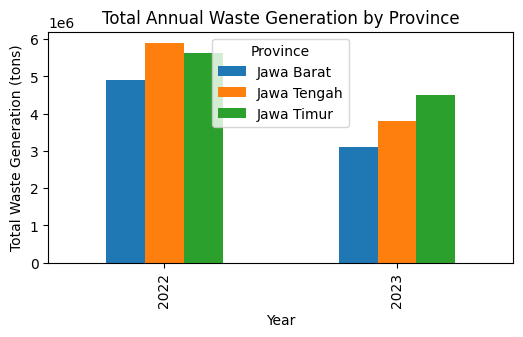

In [42]:
annual_waste_generation.plot(kind='bar', figsize=(6, 3))

# Title and labels
plt.title('Total Annual Waste Generation by Province')
plt.xlabel('Year')
plt.ylabel('Total Waste Generation (tons)')
plt.legend(title='Province')

# Display the plot
plt.show()

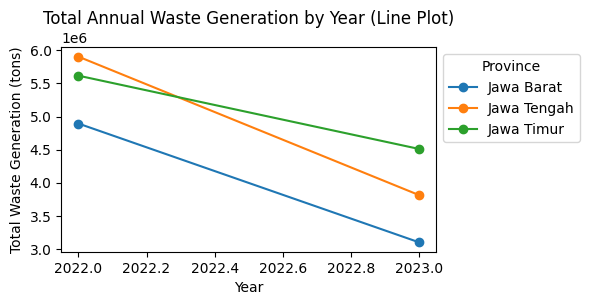

In [43]:
annual_waste_generation.plot(kind='line', marker='o', figsize=(6, 3))

# Title and labels
plt.title('Total Annual Waste Generation by Year (Line Plot)')
plt.xlabel('Year')
plt.ylabel('Total Waste Generation (tons)')
plt.legend(title='Province', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()

# What is the average total annual waste generation in each province for all years?

In [47]:
average_annual_waste_generation = filtered_data.groupby('Provinsi')['Timbulan Sampah Tahunan(ton)'].mean().reset_index()

# Display the average annual waste generation
print("Average Annual Waste Generation by Province:")
print(average_annual_waste_generation)

Average Annual Waste Generation by Province:
      Provinsi  Timbulan Sampah Tahunan(ton)
0   Jawa Barat                   3997542.720
1  Jawa Tengah                   4858448.355
2   Jawa Timur                   5063416.855


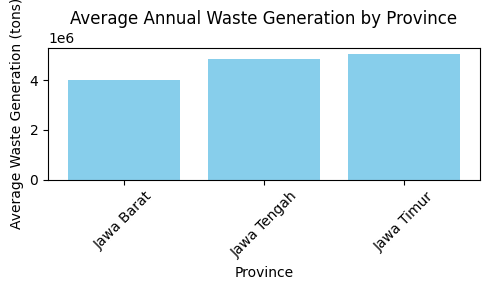

In [48]:
plt.figure(figsize=(5, 3))
plt.bar(average_annual_waste_generation['Provinsi'], average_annual_waste_generation['Timbulan Sampah Tahunan(ton)'],
        color='skyblue')
plt.title('Average Annual Waste Generation by Province')
plt.xlabel('Province')
plt.ylabel('Average Waste Generation (tons)')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

# Which province produces the most annual waste generation each year?

In [52]:
max_waste_province_each_year = filtered_data.loc[filtered_data.groupby('Tahun')['Timbulan Sampah Tahunan(ton)'].idxmax()].reset_index(drop=True)

print("Province with the most annual waste generation each year:")
print(max_waste_province_each_year[['Tahun', 'Provinsi', 'Timbulan Sampah Tahunan(ton)']])

Province with the most annual waste generation each year:
   Tahun     Provinsi  Timbulan Sampah Tahunan(ton)
0   2022  Jawa Tengah                    5904061.08
1   2023   Jawa Timur                    4509970.46


# Which province produces the least annual waste generation each year?

In [55]:
min_waste_province_each_year = filtered_data.loc[filtered_data.groupby('Tahun')['Timbulan Sampah Tahunan(ton)'].idxmin()].reset_index(drop=True)

print("Province with the least annual waste generation each year:")
print(min_waste_province_each_year[['Tahun', 'Provinsi', 'Timbulan Sampah Tahunan(ton)']])

Province with the least annual waste generation each year:
   Tahun    Provinsi  Timbulan Sampah Tahunan(ton)
0   2022  Jawa Barat                    4894648.33
1   2023  Jawa Barat                    3100437.11


# What does the graph of the total annual amount of waste look like in each province from year to year?

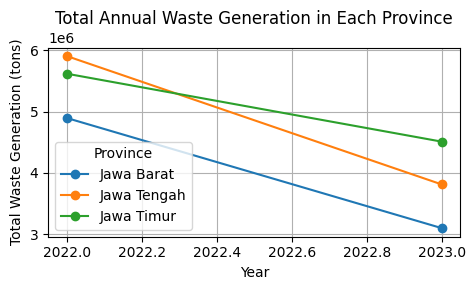

In [58]:
pivot_df = filtered_data.pivot(index='Provinsi', columns='Tahun', values='Timbulan Sampah Tahunan(ton)')

# Plotting
plt.figure(figsize=(5, 3))

# Plot each province's data
for provinsi in pivot_df.index:
    plt.plot(pivot_df.columns, pivot_df.loc[provinsi], marker='o', label=provinsi)

# Title and labels
plt.title('Total Annual Waste Generation in Each Province')
plt.xlabel('Year')
plt.ylabel('Total Waste Generation (tons)')
plt.legend(title='Province')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

# Display of categorization and visualization of average incidence annual waste in each province for the entire year with provision:
1.  The provincial category is "GREEN" if the average annual waste generation is <= 100,000 tons
2.  Th province category “Orange” if 100,000 < average annual waste generation <= 700,000 tons
3.  The provincial category is "RED" if the average annual waste generation is > 700,000 tons.

3997542.7199999997
4858448.355
5063416.855


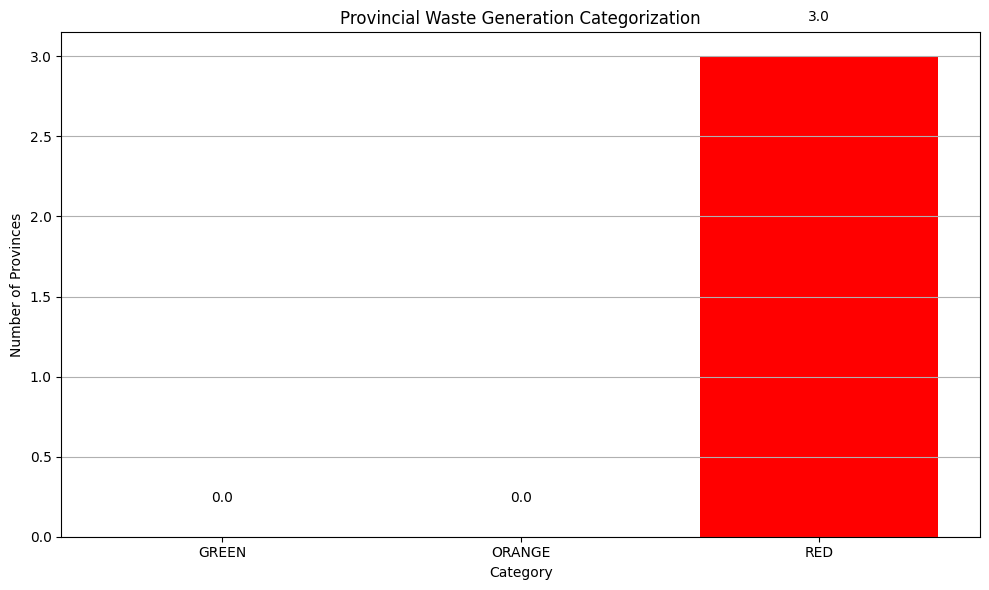

In [63]:
# Calculate average annual waste generation for each province
average_annual_waste = filtered_data.groupby('Provinsi')['Timbulan Sampah Tahunan(ton)'].mean().reset_index()

# Define category thresholds
green_threshold = 100000
orange_threshold = 700000

# Categorize provinces based on average annual waste generation
def categorize_province(avg_waste):
    print(avg_waste)
    if avg_waste <= green_threshold:
        return 'GREEN'
    elif avg_waste <= orange_threshold:
        return 'ORANGE'
    else:
        return 'RED'

# Apply categorization function to create 'Category' column
average_annual_waste['Category'] = average_annual_waste['Timbulan Sampah Tahunan(ton)'].apply(categorize_province)

category_counts = average_annual_waste['Category'].value_counts().reindex(['GREEN', 'ORANGE', 'RED']).fillna(0)

# Plotting
plt.figure(figsize=(10, 6))

# Create bar chart
bars = plt.bar(category_counts.index, category_counts.values, color=['green', 'orange', 'red'])

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom')

# Title and labels
plt.title('Provincial Waste Generation Categorization')
plt.xlabel('Category')
plt.ylabel('Number of Provinces')
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()